**ES 654 PreRequisite Assignment**
*- Madhav Kanda (20110104)*


*Import Statements*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import jax
import jax.numpy as jnp
import time
import sympy as sp      ## Need to pip install it

**Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

A1. Total number of additions required are n x m x (k-1) and multiplication are n x m x k. Corresponding to each element in the resultant matrix there is a requirement of k-1 additions and k multiplications. Thus total number of multiplications are n x m x k and additions are n x m x (k-1) as the total entries in the resultant matrix will be (n x m)

**Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [114]:
# Defining the parameters n,k,m
n = 2
k = 3
m = 4

# Initialising the matrices
matrix_1 =  np.random.randint(low = 1, high = 100,size = (n,k))
matrix_2 = np.random.randint(low = 1, high = 100, size = (k,m))

In [115]:
def mat_mul(matrix_1, matrix_2, n, k, m):
  resultant_matrix = [[0 for j in range(m)] for i in range(n)] # Initialising the resultant matrix
  for i in range(n):          # Computing matrix multiplication
    for j in range(m):
      for l in range(k):
        resultant_matrix[i][j] += matrix_1[i][l] * matrix_2[l][j]

  return resultant_matrix

In [116]:
print(mat_mul(matrix_1,matrix_2,n,k,m))
print(np.matmul(matrix_1,matrix_2))
print("Since both methods give same result hence our implementation is correct ")

[[3398, 4523, 1325, 5058], [1764, 3381, 2769, 5420]]
[[3398 4523 1325 5058]
 [1764 3381 2769 5420]]
Since both methods give same result hence our implementation is correct 


In [113]:
# Defining the parameters n,k,m
n = 10
k = 20
m = 30

# Initialising the matrices
matrix_1 =  np.random.randint(low = 1, high = 100,size = (n,k))
matrix_2 = np.random.randint(low = 1, high = 100, size = (k,m))

In [4]:
list_time = 0
std = 0

for i in range(1000):
  time_start = time.perf_counter()
  c = mat_mul(matrix_1,matrix_2,n,k,m)
  time_end = time.perf_counter()
  time_interval = time_end - time_start
  list_time += time_interval
  std += (time_interval)**2

list_time = list_time/1000      # Calculating the average time
std = std/1000                  # Calculating the average std
std = np.sqrt((std - list_time**2))*10**6
list_time = list_time*(10**6)

print('Average time for list of list matrix multiplication for 1000 iterations is ' + str(list_time) +' ms')
print('The standard deviation is '+ str(std) +' ms')

Average time for list of list matrix multiplication for 1000 iterations is 9555.791100000333 ms
The standard deviation is 3743.3606446679187 ms


In [5]:
list_time = np.zeros((1000,))
for i in range(1000):
  time_start = time.perf_counter()
  c = np.matmul(matrix_1,matrix_2)
  time_end = time.perf_counter()
  list_time[i] = time_end - time_start
print('Average time for numpy multiplication function for 1000 iterations is ' + str(list_time.mean()*(10**6)) +' ms')
print('The standard deviation is '+ str(list_time.std()*(10**6))+' ms')

Average time for numpy multiplication function for 1000 iterations is 27.45559999982561 ms
The standard deviation is 161.75582885530886 ms


*From the above result it is evident that the result obtained by using numpy 's built in method is faster than loop based approach since the numpy's approach takes advantage of hardware optimisation and its implemented in C which is way faster than python.*

**Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

*Since we will be traversing the complete array $n/2$ times and each pass has a $O(n)$ time complexity, using this method would result in a $O(n^2)$ time complexity for finding the median.*

*The second method has an O(nlog(n)) time complexity. In this method, the array is sorted (Best time complexity for sorting the array is  O(nlog(n)), and the median is $A[n/2+1]$ if the number of items is odd. If the number of elements is even, the median is average of $A[n/2]$ and $A[n/2 +1]$. Since each operation to find the median after sorting the array is constant time, thus time complexity is O(nlogn)*

In [86]:
array = list(np.random.randint(low = 1, high = 10, size = (10,)))
array

[3, 5, 2, 4, 3, 2, 5, 6, 9, 4]

In [75]:
## Function to find the median by the approach mentioned in the question having time complexity O(n^2)

def median_array(array):
  arr_len = len(array)
  if(arr_len%2==0):     ## If the length of the array is even then we will consider the average of the middle two elements
    traversals = arr_len//2
    while(traversals>=0):
      element = array[0]
      for i in range(len(array)):     ## In each for loop we are removing the highest element in the array until we reach the median element
        if(array[i]>element):
          element = array[i]
      array.remove(element)
      traversals-=1
      if(traversals==0):
        second_last = element
    return((element+second_last)/2)
  else:
    traversals = arr_len//2 -1      ## If odd then, we consider the middle most element
    while(traversals>=0):
      element = array[0]
      for i in range(len(array)):
        if(array[i]>element):
          element = array[i]
      array.remove(element)
      traversals-=1
    return element

In [87]:
median_numpy=np.median(array)       # Since the method involves removing elements from the original list hence I am calling the numpy median function before calling the implemented function so that the modified list does not get passed
median = median_array(array)
print(median,median_numpy)         
print("Since the implemented methods' result matches with the in built numpy method hence it is correctly implemented ")

4.0 4.0
Since the implemented methods' result matches with the in built numpy method hence it is correctly implemented 


In [81]:
# Method - 2 O(nlogn) (This method depends on the time complexity of the sorting algorithm (The best being O(nlogn)) as finding the middle element requires constant time)
def median_sort(array):
  array = sorted (array)
  arr_len = len(array)
  if (arr_len%2==1):
    return array[arr_len//2-1]
  else:
    return ((array[arr_len//2-1]+array[arr_len//2])/2)

In [82]:
array = list(np.random.randint(low = 1, high = 10, size = (10,)))
array

[8, 1, 3, 2, 7, 3, 3, 6, 8, 2]

In [88]:
median = median_sort(array)
print(median,np.median(array))
print("Since the implemented methods' result matches with the in built numpy method hence it is correctly implemented ")

2.5 2.5
Since the implemented methods' result matches with the in built numpy method hence it is correctly implemented 


In [95]:
# Time comparison for all the three methods
t_1 = np.zeros((1000,))
t_2 = np.zeros((1000,))
t_3 = np.zeros((1000,))

for i in range(1000):

  np.random.seed(100)
  array = list(np.random.randint(low = 1, high = 2000, size = (100,)))
  st_1 = time.perf_counter()
  value1 = median_array(array)
  et_1 = time.perf_counter()
  t_1[i] = et_1-st_1

  np.random.seed(100)
  array = list(np.random.randint(low = 1, high = 2000, size = (100,)))
  st_2 = time.perf_counter()
  value2 = median_sort(array)
  et_2 = time.perf_counter()
  t_2[i] = et_2-st_2

  np.random.seed(100)
  array = list(np.random.randint(low = 1, high = 2000, size = (100,)))
  st_3 = time.perf_counter()
  value3 = np.median(array)
  et_3 = time.perf_counter()
  t_3[i] = et_3-st_3

print("Method-1: O(n^2)")
print("The mean time for it is: "+str(t_1.mean()*(10**6))+"ms")
print("The std for it is: "+str(t_1.std()*(10**6))+"ms")

print("Method-2: O(nlogn)")
print("The mean time for it is: "+str(t_2.mean()*(10**6))+"ms")
print("The std for it is: "+str(t_2.std()*(10**6))+"ms")

print("Method-3: Numpy's inbuilt")
print("The mean time for it is: "+str(t_3.mean()*(10**6))+"ms")
print("The std for it is: "+str(t_3.std()*(10**6))+"ms")

Method-1: O(n^2)
The mean time for it is: 813.0573999997068ms
The std for it is: 503.7685785161688ms
Method-2: O(nlogn)
The mean time for it is: 61.12290000328357ms
The std for it is: 66.20406123313116ms
Method-3: Numpy's inbuilt
The mean time for it is: 192.400800001451ms
The std for it is: 176.23970246139658ms


**Q4. What is the gradient of the following function with respect to x and y?**

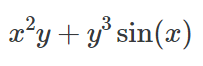

Gradient with respect to x is given by: $2xy + y^3cos(x) $

Gradient with respect to y is given by: $x^2 + 3y^2sin(x) $

**Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [96]:
# The function is defined below
def func(x_y):
  return (x_y[0]**2)*(x_y[1]) + (x_y[1]**3)*jnp.sin(x_y[0])


x_y1 = jnp.array([jnp.pi, 2.0])   ## Initialising values for x and y as pi and 2 respectively
x_y2 = jnp.array([jnp.pi/2, 3.0])   ## Initialising values for x and y as pi and 2 respectively
x_y3 = jnp.array([jnp.pi*2, 5.0])   ## Initialising values for x and y as pi and 2 respectively


grad_x = jax.grad(lambda *args: func(jnp.array(args)), argnums=0)    # Differentiating wrt x 
grad_y = jax.grad(lambda *args: func(jnp.array(args)), argnums=1)    # Differentiating wrt y 
print(f"Gradient of function with respect to x is: {grad_x(*x_y1)} and with respect to y is: {grad_y(*x_y1)} [Using Jax]")
print(f"Gradient of function with respect to x is: {(2*x_y1[0]*x_y1[1]+(x_y1[1]**3)*(jnp.cos(x_y1[0])))} and with respect to y is: {(x_y1[0]**2+(3*(x_y1[1]**2))*(jnp.sin(x_y1[0])))} [By Manually putting values in the gradient obtained]")

print(f"Gradient of function with respect to x is: {grad_x(*x_y2)} and with respect to y is: {grad_y(*x_y2)} [Using Jax]")
print(f"Gradient of function with respect to x is: {(2*x_y2[0]*x_y2[1]+(x_y2[1]**3)*(jnp.cos(x_y2[0])))} and with respect to y is: {(x_y2[0]**2+(3*(x_y2[1]**2))*(jnp.sin(x_y2[0])))} [By Manually putting values in the gradient obtained]")

print(f"Gradient of function with respect to x is: {grad_x(*x_y3)} and with respect to y is: {grad_y(*x_y3)} [Using Jax]")
print(f"Gradient of function with respect to x is: {(2*x_y3[0]*x_y3[1]+(x_y3[1]**3)*(jnp.cos(x_y3[0])))} and with respect to y is: {(x_y3[0]**2+(3*(x_y3[1]**2))*(jnp.sin(x_y3[0])))} [By Manually putting values in the gradient obtained]")

print("Thus the gradient evaluated by our method matches the analytical solution")

Gradient of function with respect to x is: 4.566370964050293 and with respect to y is: 9.869604110717773 [Using Jax]
Gradient of function with respect to x is: 4.566370964050293 and with respect to y is: 9.869604110717773 [By Manually putting values in the gradient obtained]
Gradient of function with respect to x is: 9.424777030944824 and with respect to y is: 29.4674015045166 [Using Jax]
Gradient of function with respect to x is: 9.424777030944824 and with respect to y is: 29.4674015045166 [By Manually putting values in the gradient obtained]
Gradient of function with respect to x is: 187.83184814453125 and with respect to y is: 39.478431701660156 [Using Jax]
Gradient of function with respect to x is: 187.83184814453125 and with respect to y is: 39.478431701660156 [By Manually putting values in the gradient obtained]
Thus the gradient evaluated by our method matches the analytical solution


**Q6. Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
x, y = sp.symbols('x y')
f = x**2*(y) + y**3*(sp.sin(x))     ## The given function
print(f"The derivative of the expression wrt x is {sp.diff(f,x)} and wrt y is {sp.diff(f,y)}")
print("The above expressions clearly matches with the original derivative expression")

The derivative of the expression wrt x is 2*x*y + y**3*cos(x) and wrt y is x**2 + 3*y**2*sin(x)
The above expressions clearly matches with the original derivative expression


**Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:**

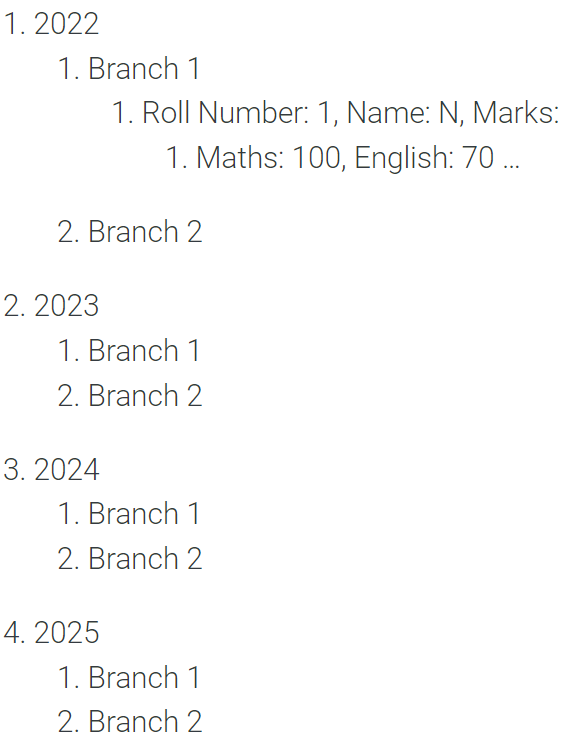

In [97]:
hierarchical_dict = {
    2022: {"Computer Science": {1: {"Roll Number":32,"Name": "Madhav","Marks": {"Maths": 100,"English": 80}},2: {"Roll Number":45,"Name": "Sahil","Marks": {"Maths": 80,"English": 10}}},
    "Electrical": {1: {"Roll Number":12,"Name": "Jinay","Marks": {"Maths": 50,"English": 50}},2: {"Roll Number":39,"Name": "Sanskar","Marks": {"Maths": 100,"English": 45}}}},

    2023: {"Computer Science": {1: {"Roll Number":2,"Name": "Dhyey","Marks": {"Maths": 69,"English": 34}},2: {"Roll Number":23,"Name": "Progyan","Marks": {"Maths": 57,"English": 100}}},
    "Electrical": {1: {"Roll Number":45,"Name": "Ksheer","Marks": {"Maths": 92,"English": 63}},2: {"Roll Number":98,"Name": "Yeeshu","Marks": {"Maths": 19,"English": 56}}}},

    2024: {"Computer Science": {1: {"Roll Number":13,"Name": "Dhruv","Marks": {"Maths": 49,"English": 24}},2: {"Roll Number":27,"Name": "Saatvik","Marks": {"Maths": 87,"English": 30}}},
    "Electrical": {1: {"Roll Number":42,"Name": "Vrajesh","Marks": {"Maths": 22,"English": 43}}}},
    2025: {"Computer Science": {1: {"Roll Number":6,"Name": "Dhairya","Marks": {"Maths": 56,"English": 84}}},
    "Electrical": {1: {"Roll Number":12,"Name": "Pushpendra","Marks": {"Maths": 62,"English": 73}}}}}

**Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [98]:
class Student:
    def __init__(self, roll, name, marks):          ## Student class stores the roll number, name, marks of the student
        self.Roll = roll
        self.Name = name
        self.Marks = marks

class Branch:
    def __init__(self, name, students):             ## Branch class stores the branch name and student
        self.Name = name
        self.Students = students

class Year:
    def __init__(self, year, branches):             ## Year class stores the Year and the branch data of the student
        self.Year = year
        self.Branches = branches

database = [
    Year(2022, [Branch('Computer Science', [Student(32, 'Madhav', {'Maths': 100, 'English': 80}),Student(45, 'Sahil', {'Maths': 80, 'English': 10})]),Branch('Electrical', [Student(12, 'Jinay', {'Maths': 50, 'English': 50}),Student(39, 'Sanskar', {'Maths': 100, 'English': 45})])]),

    Year(2023, [Branch('Computer Science', [Student(2, 'Dhyey', {'Maths': 69, 'English': 34}),Student(23, 'Progyan', {'Maths': 57, 'English': 100})]),Branch('Electrical', [Student(45, 'Ksheer', {'Maths': 92, 'English': 63}),Student(98, 'Yeeshu', {'Maths': 19, 'English': 56})])]),
    
    Year(2024, [Branch('Computer Science', [Student(13, 'Dhruv', {'Maths': 49, 'English': 24}),Student(27, 'Saatvik', {'Maths': 87, 'English': 30})]),Branch('Electrical', [Student(42, 'Vrajesh', {'Maths': 22, 'English': 43})])]),

    Year(2025, [Branch('Computer Science', [Student(6, 'Dhairya', {'Maths': 56, 'English': 84})]),Branch('Electrical', [Student(12, 'Pushpendra', {'Maths': 62, 'English': 73})])])
]


In [99]:
print(database[0].Branches[0].Students[1].Roll)
print(database[0].Branches[0].Students[1].Name)
print(database[0].Branches[0].Students[1].Marks)

45
Sahil
{'Maths': 80, 'English': 10}


**Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

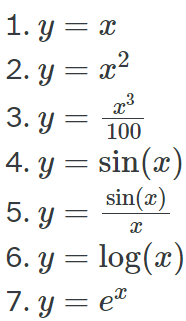

In [101]:
# Plot having all the plot in different subplots
x = jnp.linspace(0.5,100,200)  ## We want step size of 0.5. Thus, (100-0.5)/(200-1) = 0.5 (The required step size)
y1 = x
y2 = x**2
y3 = (x**3)/100
y4 = jnp.sin(x)
y5 = jnp.sin(x)/x
y6 = jnp.log(x)
y7 = jnp.exp(x)

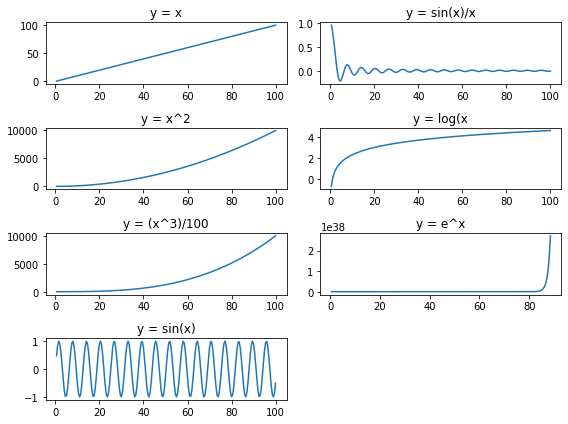

In [102]:
fig, axs = plt.subplots(4, 2, figsize=(8,6))
axs[0, 0].plot(x, y1)              
axs[0, 0].set_title("y = x")        ## y = x
axs[1, 0].plot(x, y2)
axs[1, 0].set_title("y = x^2")      ## y = x^2
axs[2, 0].plot(x, y3)
axs[2, 0].set_title("y = (x^3)/100")  ## y = x^3/100
axs[3, 0].plot(x, y4) 
axs[3, 0].set_title("y = sin(x)")   ## y = sin(x)
axs[0, 1].plot(x, y5) 
axs[0, 1].set_title("y = sin(x)/x") ## y = sin(x)/x
axs[1, 1].plot(x, y6) 
axs[1, 1].set_title("y = log(x")    ## y = log(x)
axs[2, 1].plot(x, y7) 
axs[2, 1].set_title("y = e^x")      ## y = e^x
fig.delaxes(axs[3,1])
fig.tight_layout()

In [104]:
# All functions in a single plot for comparison purpose

# plt.plot(x,y1, label = "y = x")
# plt.plot(x,y2, label = "y = x^2")
# plt.plot(x,y3, label = "y = (x^3/100)")
# plt.plot(x,y4, label = "y = sin(x)")
# plt.plot(x,y5, label = "y = sin(x)/x")
# plt.plot(x,y6, label = "y = log(x)")
# plt.plot(x,y7, label = "y = e^x")
# plt.legend()
# plt.show()

**Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean**

In [ ]:
random_matrix = np.random.rand(20,5)
random_matrix = random_matrix + 1     ## Transforming matrix values ranging between 0 & 1 to 1 & 2 

In [ ]:
dataframe = pd.DataFrame(random_matrix)
dataframe

,0,1,2,3,4
0,1.668788,1.788832,1.895740,1.250189,1.919821
1,1.862605,1.506085,1.567902,1.114932,1.762116
2,1.173225,1.533836,1.126437,1.072917,1.609027
3,1.491203,1.674810,1.790854,1.982687,1.084081
4,1.631212,1.576975,1.650642,1.543179,1.557367
5,1.868555,1.452012,1.534976,1.690964,1.089495
6,1.431925,1.102134,1.137810,1.002126,1.209706
7,1.216637,1.516244,1.570208,1.823961,1.486711
8,1.891455,1.395061,1.744611,1.552757,1.623825
9,1.270392,1.937595,1.769655,1.145595,1.537434


In [ ]:
dataframe.rename(columns = {0:"a",1:"b",2:"c",3:"d",4:"e"}  , inplace=True)    ## Renaming the columns according to the condition provided in question
dataframe

,a,b,c,d,e
0,1.668788,1.788832,1.895740,1.250189,1.919821
1,1.862605,1.506085,1.567902,1.114932,1.762116
2,1.173225,1.533836,1.126437,1.072917,1.609027
3,1.491203,1.674810,1.790854,1.982687,1.084081
4,1.631212,1.576975,1.650642,1.543179,1.557367
5,1.868555,1.452012,1.534976,1.690964,1.089495
6,1.431925,1.102134,1.137810,1.002126,1.209706
7,1.216637,1.516244,1.570208,1.823961,1.486711
8,1.891455,1.395061,1.744611,1.552757,1.623825
9,1.270392,1.937595,1.769655,1.145595,1.537434


In [ ]:
print(f"The column having highest std is {chr(97+dataframe.std(axis=0).argmax())} and the value is {dataframe.std(axis=0).max()}") ## Added 97 to convert to ascii to get required column in alphabet
print(f"The row having lowest mean is {dataframe.mean(axis=1).argmin()} and the value is {dataframe.mean(axis=1).min()}")

The column having highest std is a and the value is 0.314833083788699
The row having lowest mean is 6 and the value is 1.1767402854260722


**Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [ ]:
dataframe['f'] = dataframe['a'] + dataframe['b'] + dataframe['c'] + dataframe['d'] + dataframe['e']  ## Adding new f column
dataframe

,a,b,c,d,e,f
0,1.668788,1.788832,1.895740,1.250189,1.919821,8.523369
1,1.862605,1.506085,1.567902,1.114932,1.762116,7.813641
2,1.173225,1.533836,1.126437,1.072917,1.609027,6.515443
3,1.491203,1.674810,1.790854,1.982687,1.084081,8.023635
4,1.631212,1.576975,1.650642,1.543179,1.557367,7.959376
5,1.868555,1.452012,1.534976,1.690964,1.089495,7.636001
6,1.431925,1.102134,1.137810,1.002126,1.209706,5.883701
7,1.216637,1.516244,1.570208,1.823961,1.486711,7.613762
8,1.891455,1.395061,1.744611,1.552757,1.623825,8.207709
9,1.270392,1.937595,1.769655,1.145595,1.537434,7.660671


In [ ]:
dataframe['g'] = np.where(dataframe['f']<8,"LT8","GT8")
dataframe

,a,b,c,d,e,f,g
0,1.668788,1.788832,1.895740,1.250189,1.919821,8.523369,GT8
1,1.862605,1.506085,1.567902,1.114932,1.762116,7.813641,LT8
2,1.173225,1.533836,1.126437,1.072917,1.609027,6.515443,LT8
3,1.491203,1.674810,1.790854,1.982687,1.084081,8.023635,GT8
4,1.631212,1.576975,1.650642,1.543179,1.557367,7.959376,LT8
5,1.868555,1.452012,1.534976,1.690964,1.089495,7.636001,LT8
6,1.431925,1.102134,1.137810,1.002126,1.209706,5.883701,LT8
7,1.216637,1.516244,1.570208,1.823961,1.486711,7.613762,LT8
8,1.891455,1.395061,1.744611,1.552757,1.623825,8.207709,GT8
9,1.270392,1.937595,1.769655,1.145595,1.537434,7.660671,LT8


In [ ]:
print(f"The total number of rows in the dataframe where the value in the column “g” is “LT8” are {dataframe['g'].value_counts()['LT8']}")

The total number of rows in the dataframe where the value in the column “g” is “LT8” are 16


In [ ]:
dataframe_LT8 = dataframe[dataframe['g']=="LT8"]
std_lt8 = dataframe_LT8['f'].std(axis=0)

dataframe_GT8 = dataframe[dataframe['g']=="GT8"]
std_gt8 = dataframe_GT8['f'].std(axis=0)

print(f'The std of the column “f” for the rows where the value in the column “g” is “LT8” is {std_lt8} and for “GT8” is {std_gt8}')

The std of the column “f” for the rows where the value in the column “g” is “LT8” is 0.543983486159421 and for “GT8” is 0.25234181435387665


**Q12. Write a small piece of code to explain broadcasting in numpy.**

In [ ]:
Vector_A = jnp.array([1,2,3,4,5])
Vector_B = jnp.array([3])
Vector_C = Vector_A + Vector_B
print(Vector_C)
print(f"The shape of Vector A is {Vector_A.shape}, Vector B's shape is {Vector_B.shape} and their resultant shape is {Vector_C.shape}")

# Here despite the fact that Vector_A is a 1X5 dimension array still when added with an array of 1X1 dimension
# it broadcasts the smaller array to the size of the larger array so that addition can take place to get final result as 5X1 array

[4 5 6 7 8]
The shape of Vector A is (5,), Vector B's shape is (1,) and their resultant shape is (5,)


**Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [ ]:
def argmin(array):
  min_index=0
  min_element=array[0]
  for current_index in range(array.size):
    if(min_element>array[current_index]):
      min_element=array[current_index]
      min_index=current_index
  return min_index

In [ ]:
a = jnp.array([2,3,41,0,10,3])
print(argmin(a),np.argmin(a))
# The implementation done for the argmin function works perfectly as the result matches with the inbuilt function
# as indeed the lowest element is at index 3

3 3
